## Introduction

The data are downloaded from [Movebank]().

More specifically, the following data are used:

These data are in the form of a .csv file and in order to work with the data, we need to convert them first into a Geopandas datafile.

The data are downloaded from local drive. This code is written in Google Colab. Hence, the data need to be uploaded first from local into Google Colab.

## Importing packages

In [1]:
import pandas as pd
import geopandas as gpd

## Data preparation

In [2]:
cattle = pd.read_csv('Daily grazing movements of cattle in the Far North Region, Cameroon.csv')

In [3]:
cattle.head()

,event-id,visible,timestamp,location-long,location-lat,comments,ground-speed,heading,height-above-ellipsoid,study-specific-measurement,tag-tech-spec,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,5170988886,True,2009-03-12 05:11:00.000,15.088783,11.146467,day,0.044704,243.0,302.9712,4-26,0,gps,Bos taurus,cattle0120309day,cattle0120309day,Daily grazing movements of cattle in the Far N...
1,5170988887,True,2009-03-12 05:11:00.000,15.088783,11.146450,day,0.625856,289.0,305.1048,6-3,1,gps,Bos taurus,cattle0120309day,cattle0120309day,Daily grazing movements of cattle in the Far N...
2,5170988888,True,2009-03-12 05:11:00.000,15.088767,11.146467,day,0.894080,304.0,305.1048,7-3,2,gps,Bos taurus,cattle0120309day,cattle0120309day,Daily grazing movements of cattle in the Far N...
3,5170988889,True,2009-03-12 05:11:00.000,15.088750,11.146467,day,1.788160,306.0,306.0192,17-3,3,gps,Bos taurus,cattle0120309day,cattle0120309day,Daily grazing movements of cattle in the Far N...
4,5170988890,True,2009-03-12 05:11:00.000,15.088700,11.146500,day,0.894080,297.0,313.0296,9-3,4,gps,Bos taurus,cattle0120309day,cattle0120309day,Daily grazing movements of cattle in the Far N...


In [4]:
cattle.describe()

,event-id,location-long,location-lat,ground-speed,heading,height-above-ellipsoid,tag-tech-spec
count,1.669210e+05,166921.000000,166921.000000,166921.000000,166921.000000,166921.000000,166921.000000
mean,5.171072e+09,14.983495,11.165128,0.602474,167.935065,319.572482,3292.112083
std,4.818699e+04,0.081813,0.040981,0.417488,108.102411,2.703808,2226.378777
min,5.170989e+09,14.863667,11.096683,0.000000,0.000000,289.864800,0.000000
25%,5.171031e+09,14.897383,11.135517,0.178816,90.000000,317.906400,1280.000000
50%,5.171072e+09,14.998083,11.161433,0.625856,166.000000,320.040000,3078.000000
75%,5.171114e+09,15.072617,11.198683,0.894080,270.000000,320.954400,5082.000000
max,5.171156e+09,15.097983,11.246783,4.917440,356.000000,344.119200,8816.000000


In [5]:
cattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166921 entries, 0 to 166920
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   event-id                         166921 non-null  int64  
 1   visible                          166921 non-null  bool   
 2   timestamp                        166921 non-null  object 
 3   location-long                    166921 non-null  float64
 4   location-lat                     166921 non-null  float64
 5   comments                         166921 non-null  object 
 6   ground-speed                     166921 non-null  float64
 7   heading                          166921 non-null  float64
 8   height-above-ellipsoid           166921 non-null  float64
 9   study-specific-measurement       166921 non-null  object 
 10  tag-tech-spec                    166921 non-null  int64  
 11  sensor-type                      166921 non-null  object 
 12  in

In [7]:
cattle.columns

Index(['event-id', 'visible', 'timestamp', 'location-long', 'location-lat',
       'comments', 'ground-speed', 'heading', 'height-above-ellipsoid',
       'study-specific-measurement', 'tag-tech-spec', 'sensor-type',
       'individual-taxon-canonical-name', 'tag-local-identifier',
       'individual-local-identifier', 'study-name'],
      dtype='object')

In [9]:
count_cow = cattle['individual-local-identifier'].value_counts()
print(f'There are {len(count_cow)} cows in the dataset.')

There are 33 cows in the dataset.


In [10]:
count_obs = cattle['location-long'].value_counts()
print(f'There are {len(count_obs)} GPS points in the dataset.')

There are 10481 GPS points in the dataset.


In [14]:
counts_day = cattle['comments'].value_counts()
print(f'There are {counts_day.iloc[0]} observations during day time.')
print(f'There are {counts_day.iloc[1]} observations during night time.')

There are 148112 observations during day time.
There are 18809 observations during night time.


In [15]:
df = gpd.GeoDataFrame(cattle, geometry=gpd.points_from_xy(cattle['location-long'], cattle['location-lat']), crs="EPSG:4326")

In [17]:
df.head()

,event-id,visible,timestamp,location-long,location-lat,comments,ground-speed,heading,height-above-ellipsoid,study-specific-measurement,tag-tech-spec,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name,geometry
0,5170988886,True,2009-03-12 05:11:00.000,15.088783,11.146467,day,0.044704,243.0,302.9712,4-26,0,gps,Bos taurus,cattle0120309day,cattle0120309day,Daily grazing movements of cattle in the Far N...,POINT (15.08878 11.14647)
1,5170988887,True,2009-03-12 05:11:00.000,15.088783,11.146450,day,0.625856,289.0,305.1048,6-3,1,gps,Bos taurus,cattle0120309day,cattle0120309day,Daily grazing movements of cattle in the Far N...,POINT (15.08878 11.14645)
2,5170988888,True,2009-03-12 05:11:00.000,15.088767,11.146467,day,0.894080,304.0,305.1048,7-3,2,gps,Bos taurus,cattle0120309day,cattle0120309day,Daily grazing movements of cattle in the Far N...,POINT (15.08877 11.14647)
3,5170988889,True,2009-03-12 05:11:00.000,15.088750,11.146467,day,1.788160,306.0,306.0192,17-3,3,gps,Bos taurus,cattle0120309day,cattle0120309day,Daily grazing movements of cattle in the Far N...,POINT (15.08875 11.14647)
4,5170988890,True,2009-03-12 05:11:00.000,15.088700,11.146500,day,0.894080,297.0,313.0296,9-3,4,gps,Bos taurus,cattle0120309day,cattle0120309day,Daily grazing movements of cattle in the Far N...,POINT (15.0887 11.1465)


In [18]:
df.shape

(166921, 17)

Plot without any frills:

<Axes: >

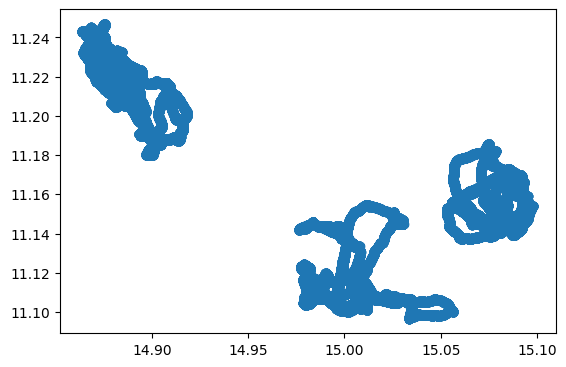

In [19]:
df.plot()

The marker is too thick:

<Axes: >

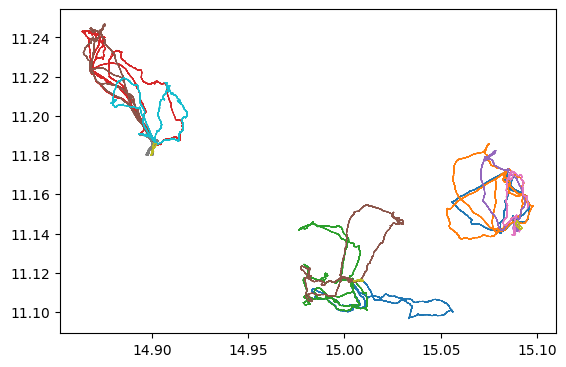

In [22]:
df.plot(column = 'individual-local-identifier', marker = 'o', edgecolor ="none", markersize = 0.5)

Split up the data according day or night:

Obtain only the observations during the day:

In [20]:
df_day = df[df['comments']=='day']
df_day.shape

(148112, 17)

Obtain only the observations during the night:

In [23]:
df_night = df[df['comments']=='night']

Plot again:

<Axes: >

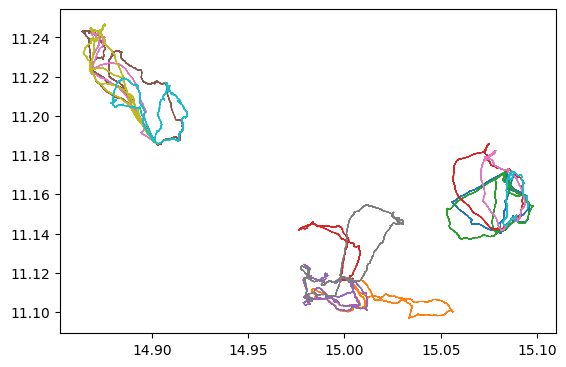

In [24]:
df_day.plot(column = 'individual-local-identifier', marker = 'o', edgecolor ="none", markersize = 0.5)

<Axes: >

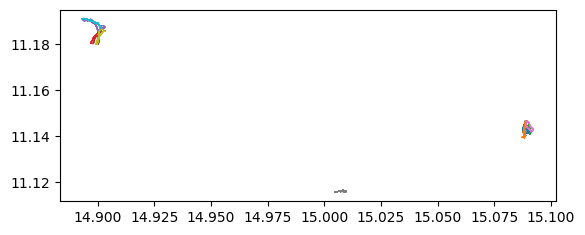

In [25]:
df_night.plot(column = 'individual-local-identifier', marker = 'o', edgecolor ="none", markersize = 0.5)

The plots are not so nice yet so we need to improve them a bit later on.

Download the data into a shape file:

In [26]:
df.to_file('movement.shp')

<ipython-input-26-1bb0749a9409>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file('movement.shp')
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'location-long' to 'location-l'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'location-lat' to 'location_1'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'ground-speed' to 'ground-spe'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'height-above-ellipsoid' to 'height-abo'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'study-specific-measurement' to 'study-spec'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogri

The names are a bit strange so perhaps we can truncate it here itself. From Google Colab, the files can be downloaded to view in your software.